# Ingreso a Drive y GitHub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from getpass import getpass

PASS = getpass('Enter your password')

!git config --global user.email "jltg_1501@hotmail.com"
!git config --global user.name "Jorge-1501"
!git config --global user.password {PASS}

Enter your password··········


In [11]:
!pwd

/content/drive/MyDrive/Colab_GitHub/Redes-Neuronales/Digitos/src


In [ ]:
%cd /content/drive/MyDrive/Colab_GitHub/Redes-Neuronales/Digitos/src

/content/drive/MyDrive/Colab_GitHub/Redes-Neuronales/Digitos/src


In [ ]:
!ls -al

conv.py			   network2.py
Épocas_dígitos.png	   network3.py
Épocas_SGDconMomentum.png  network.py
expand_mnist.py		   __pycache__
.ipynb_checkpoints	   Reconocimiento_digitos.ipynb
mnist_average_darkness.py  Tarea_2.pdf
mnist_loader.py		   Tarea3-Redes.ipynb
mnist_svm.py


In [ ]:
!git status

Refresh index: 100% (96/96), done.
On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
#!git add .

In [ ]:
#!git commit -m 'Notebook creada: Tarea3-Redes'

In [ ]:
#!git push

# Inicio de la Tarea 3

## Parte 1
Red con Keras

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop

In [13]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [15]:
# Creación del modelo [784, 30, 10]
model = models.Sequential()
model.add(layers.Dense(784, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(30, activation='sigmoid', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
# Compilar el modelo
custom_optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-09)

model.compile(optimizer = custom_optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=30, batch_size=10, validation_split=0.2)

Epoch 1/30
4800/4800 [==============================] - 22s 4ms/step - loss: 0.3658 - accuracy: 0.8999 - val_loss: 0.1831 - val_accuracy: 0.9463
Epoch 2/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1560 - accuracy: 0.9538 - val_loss: 0.1286 - val_accuracy: 0.9644
Epoch 3/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.1088 - accuracy: 0.9679 - val_loss: 0.1111 - val_accuracy: 0.9695
Epoch 4/30
4800/4800 [==============================] - 18s 4ms/step - loss: 0.0855 - accuracy: 0.9754 - val_loss: 0.1062 - val_accuracy: 0.9716
Epoch 5/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0691 - accuracy: 0.9805 - val_loss: 0.1052 - val_accuracy: 0.9716
Epoch 6/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0560 - accuracy: 0.9840 - val_loss: 0.1110 - val_accuracy: 0.9722
Epoch 7/30
4800/4800 [==============================] - 17s 4ms/step - loss: 0.0491 - accuracy: 0.9867 - val_loss: 0.0976 - val_ac

In [18]:
# Evaluación el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1202 - accuracy: 0.9819
Precisión en el conjunto de prueba: 0.9818999767303467


In [19]:
import matplotlib.pyplot as plt

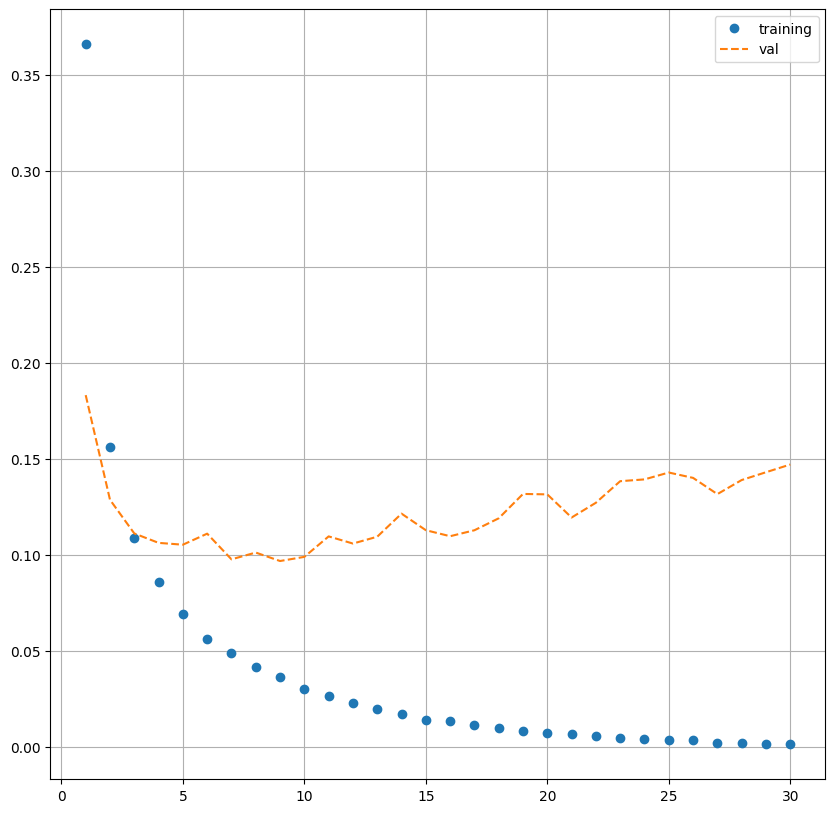

In [20]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.grid()
plt.show()

¿Obtuviste resultados similares? No, fueron notablemente mejores. Se obtuvo un accurancy del 0.9815 contra un 0.8412 del anterior modelo utilizando CPU. Mientras que al cambiar el entorno a una T4 GPU el tiempo se redujo a 9 minutos y un accurancy de 0.9818. El sobreajuste se mantiene igual en cada caso.


¿Tardó lo mismo para entrenar el mismo número de epocas? Tardó menos, un aproximado de 21 minutos contra los casi 30 anteriormente.

In [21]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git status
!git add .
!git commit -m "Por guardado automático es mejor hacer push en una sola celda"
!git push

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Tarea3-Redes.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
[main fb88598] Por guardado automático es mejor hacer push en una sola celda
 1 file changed, 1 insertion(+), 1 deletion(-)
Enumerating objects: 14, done.
Counting objects: 100% (14/14), done.
Delta compression using up to 2 threads
Compressing objects: 100% (10/10), done.
Writing objects: 100% (10/10), 30.77 KiB | 2.37 MiB/s, done.
Total 10 (delta 5), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (5/5), completed with 2 local objects.
To https://github.com/Jorge-1501/Redes-Neuronales
   28f3685..fb88598  main -> main


## Parte 2
Modificacion de parámetros

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [ ]:
# Cargar el conjunto de datos MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
# Reestructuración los datos
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Creación del modelo
model2 = models.Sequential()
model2.add(layers.Dense(512, activation='sigmoid', input_shape=(28 * 28,)))
model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compilar el modelo
custom_optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-09)

model.compile(optimizer = custom_optimizer,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=30, batch_size=10, validation_split=0.2)

In [ ]:
# Evaluación el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Precisión en el conjunto de prueba:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0998 - accuracy: 0.9815
Precisión en el conjunto de prueba: 0.9815000295639038


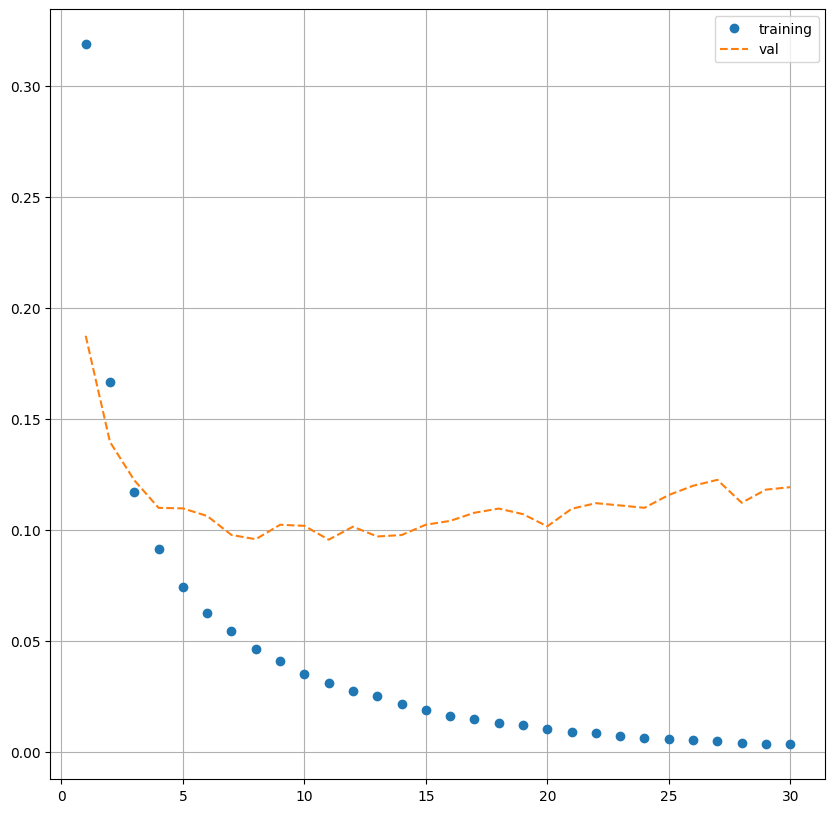

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.grid()
plt.show()

## Parte 3
Implimentación de regularizadores

# Reporte de resultados